## Prepare Environment

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

## Data preparation

In [3]:
log_names = os.listdir("./logs/")

filenames = []
nrun = []
expname = []
runtag = []
runtime = []

for full_name in log_names:
    name = os.path.splitext(full_name)[0]
    tokens = name.split("_")
    tokens[0] = int(tokens[0][4::])
    filenames.append(full_name)
    nrun.append(tokens[0])
    expname.append(tokens[1])
    runtag.append(tokens[2])
    with open("./logs/" + full_name) as f:
        line = f.read()
        line = line.split("tid: ")[1]
        line = line.split("\n")[-2]
        line = line.split("Oopt  ")[1]
        line = line.split(" nth")[0]
        runtime.append(float(line))

data = {"filename" : filenames, "nrun" : nrun, "expname" : expname, "runtag" : runtag, "runtime" : runtime}
DF = pd.DataFrame(data)

In [4]:
log_names = os.listdir("./logs/")

sampling_runtimes = []
modeling_runtimes = []
for full_name in log_names:
    name = os.path.splitext(full_name)[0]
    tokens = name.split("_")
    tokens[0] = int(tokens[0][4::])
    if tokens[1] == "green" or "greengp":
        with open("./logs/" + full_name) as f:
            line = f.read()
            line = line.split("tid: ")[1]
            line = line.split("\n")[-3]
            line = line.split("    Os  [[")[1]
            line = line[0:len(line)-2]
            runtimes = line.split("], [")
            runtimes = [float(runtime) for runtime in runtimes]
            for runtime in runtimes[0:tokens[0]//2]:
                if runtime < 1e8:
                    sampling_runtimes.append(runtime)
            for runtime in runtimes[tokens[0]//2::]:
                if runtime < 1e8:
                    modeling_runtimes.append(runtime)
    else:
        with open("./logs/" + full_name) as f:
            line = f.read()
            line = line.split("tid: ")[1]
            line = line.split("\n")[-3]
            line = line.split("    Os  [[")[1]
            line = line[0:len(line)-2]
            runtimes = line.split("], [")
            runtimes = [float(runtime) for runtime in runtimes]
            for runtime in runtimes[0:tokens[0]]:
                if runtime < 1e8:
                    sampling_runtimes.append(runtime)

## Figure 3:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


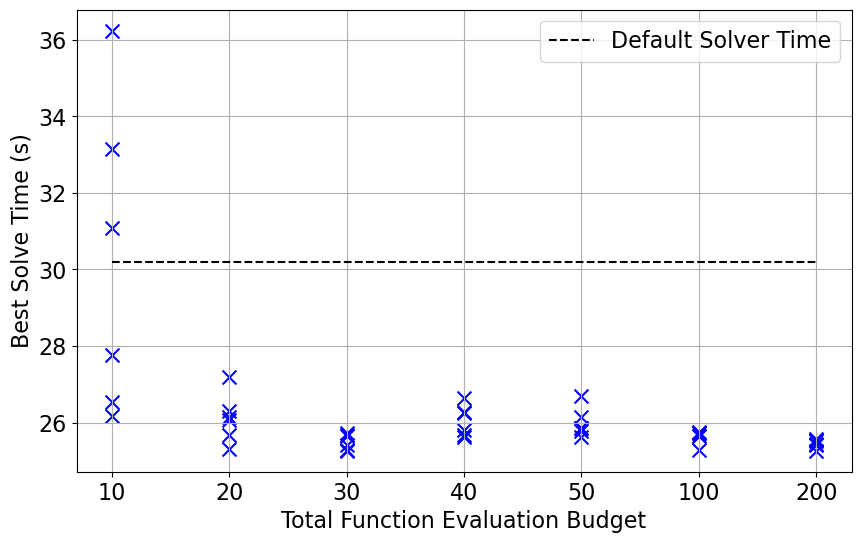

In [5]:
fig3_DF = DF.loc[DF["expname"] == "green"]

nruns = [10, 20, 30, 40, 50, 100, 200]
plt.figure(figsize=(10,6))
for i in range(len(nruns)):
    runtimes = fig3_DF.loc[fig3_DF["nrun"] == nruns[i]]["runtime"].to_numpy()
    plt.scatter(i*np.ones(runtimes.shape), runtimes, s=100, marker='x', color='blue')
plt.plot([0, 6], [30.2, 30.2], '--', color='black', label="Default Solver Time")
plt.legend()
plt.grid()
plt.xticks([0,1,2,3,4,5,6], nruns)
plt.xlabel("Total Function Evaluation Budget")
plt.ylabel("Best Solve Time (s)")
plt.show()

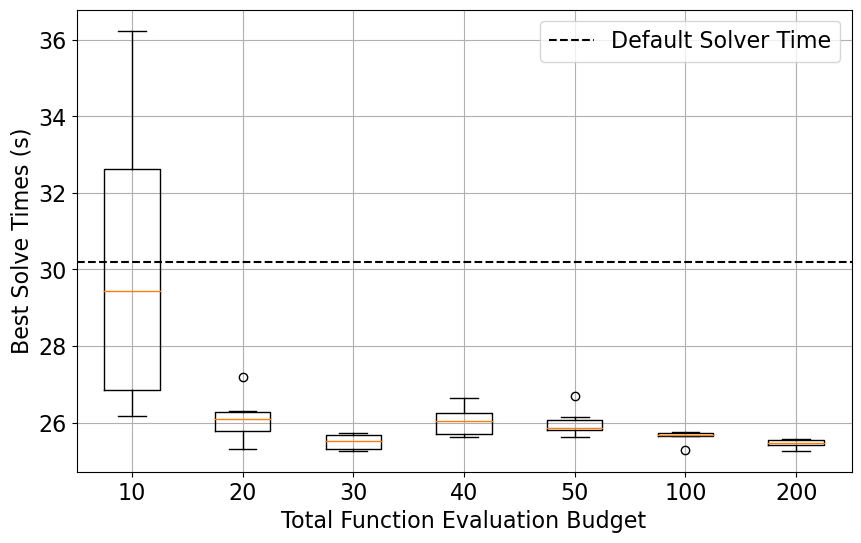

In [35]:
fig3_DF = DF.loc[DF["expname"] == "green"]

nruns = [10, 20, 30, 40, 50, 100, 200]
plt.figure(figsize=(10,6))
runtimes = []
for i in range(len(nruns)):
    runtimes.append(fig3_DF.loc[fig3_DF["nrun"] == nruns[i]]["runtime"].to_numpy())
plt.boxplot(runtimes)
plt.plot([0.5, 7.5], [30.2, 30.2], '--', color='black', label="Default Solver Time")
plt.legend()
plt.grid()
plt.xticks([1,2,3,4,5,6,7], nruns)
plt.xlabel("Total Function Evaluation Budget")
plt.ylabel("Best Solve Times (s)")
plt.show()

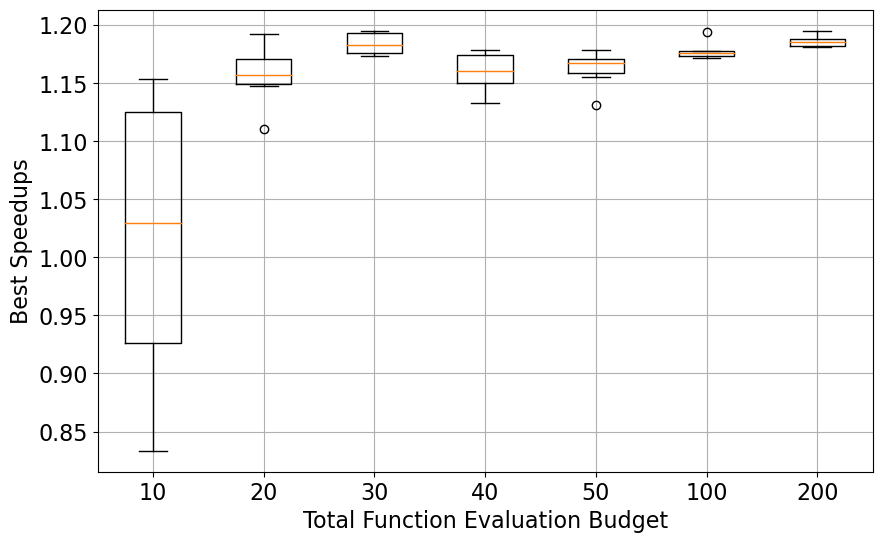

In [24]:
fig3_DF = DF.loc[DF["expname"] == "green"]

nruns = [10, 20, 30, 40, 50, 100, 200]
plt.figure(figsize=(10,6))
runtimes = []
for i in range(len(nruns)):
    runtimes.append(30.2 / fig3_DF.loc[fig3_DF["nrun"] == nruns[i]]["runtime"].to_numpy())

avg_speedups = [np.mean(speedups) for speedups in runtimes]

plt.boxplot(runtimes)
#plt.plot([0.5, 7.5], [30.2, 30.2], '--', color='black', label="Default Solver Time")
#plt.legend()
plt.grid()
plt.xticks([1,2,3,4,5,6,7], nruns)
plt.xlabel("Total Function Evaluation Budget")
plt.ylabel("Best Speedups")
plt.show()

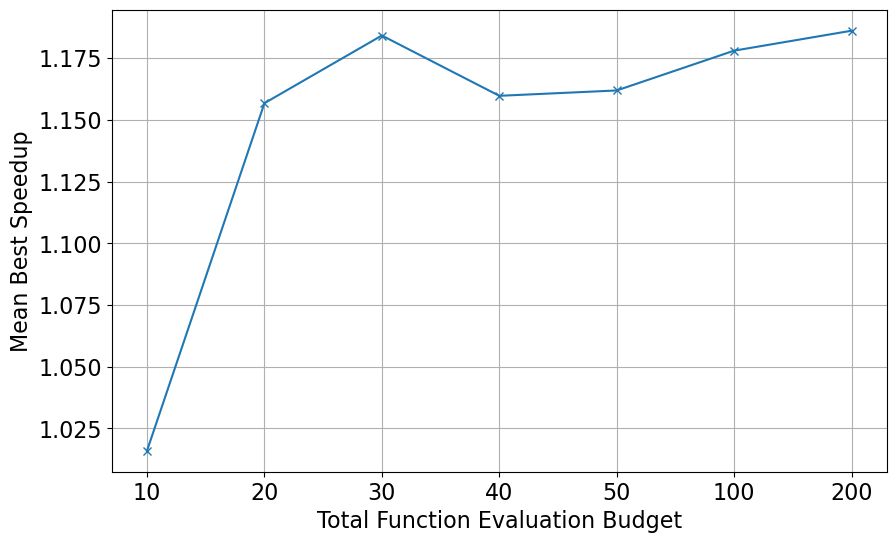

In [28]:
nruns = [10, 20, 30, 40, 50, 100, 200]
plt.figure(figsize=(10,6))

plt.plot([1,2,3,4,5,6,7], avg_speedups, '-x')

plt.grid()
plt.xticks([1,2,3,4,5,6,7], nruns)
plt.xlabel("Total Function Evaluation Budget")
plt.ylabel("Mean Best Speedup")
plt.show()

## Figure 4:

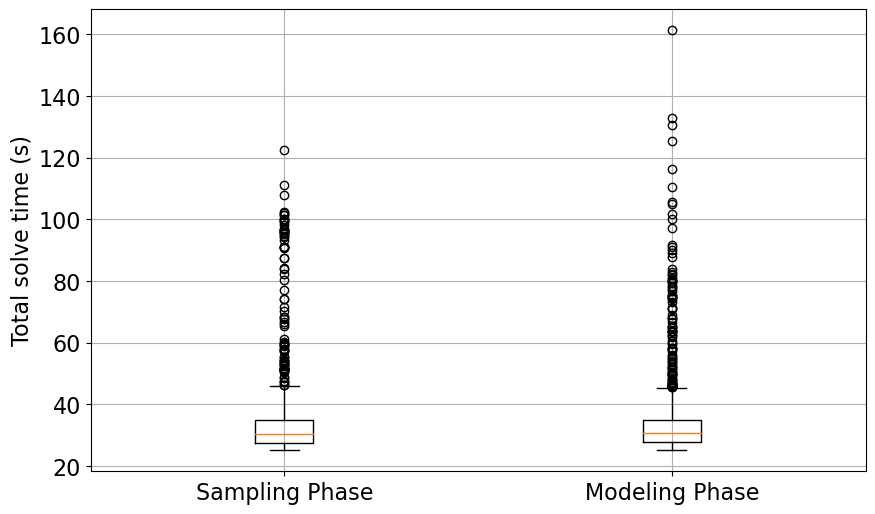

In [6]:
plt.figure(figsize=(10,6))
plt.boxplot([sampling_runtimes, modeling_runtimes], positions=[1,2], labels=["Sampling Phase", "Modeling Phase"])
plt.ylabel("Total solve time (s)")
plt.grid()
plt.show()

## Figure 5:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


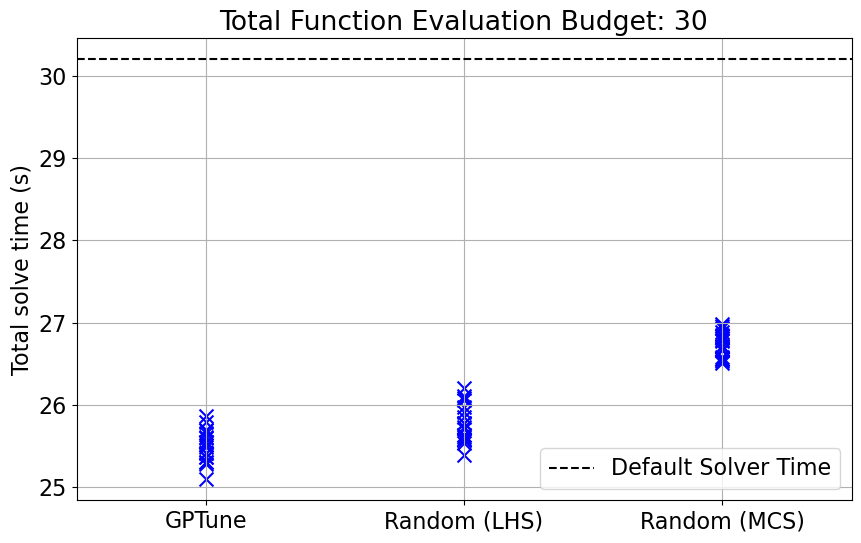

In [7]:
data_gp = DF.loc[DF["expname"] == "greengp"]["runtime"].to_numpy()
data_lhs = DF.loc[DF["expname"] == "greenlhs"]["runtime"].to_numpy()
data_mcs = DF.loc[DF["expname"] == "greenrand"]["runtime"].to_numpy()

labels = ["GPTune", "Random (LHS)", "Random (MCS)"]

plt.figure(figsize=(10,6))
plt.scatter(0*np.ones(data_gp.shape), data_gp, s=100, marker='x', color='blue')
plt.scatter(1*np.ones(data_lhs.shape), data_lhs, s=100, marker='x', color='blue')
plt.scatter(2*np.ones(data_mcs.shape), data_mcs, s=100, marker='x', color='blue')
plt.plot([-0.5, 2.5], [30.2, 30.2], '--', color='black', label="Default Solver Time")
plt.legend()
plt.grid()
plt.xlim([-0.5,2.5])
plt.xticks([0,1,2], labels)
plt.title("Total Function Evaluation Budget: 30")
plt.ylabel("Total solve time (s)")
plt.show()

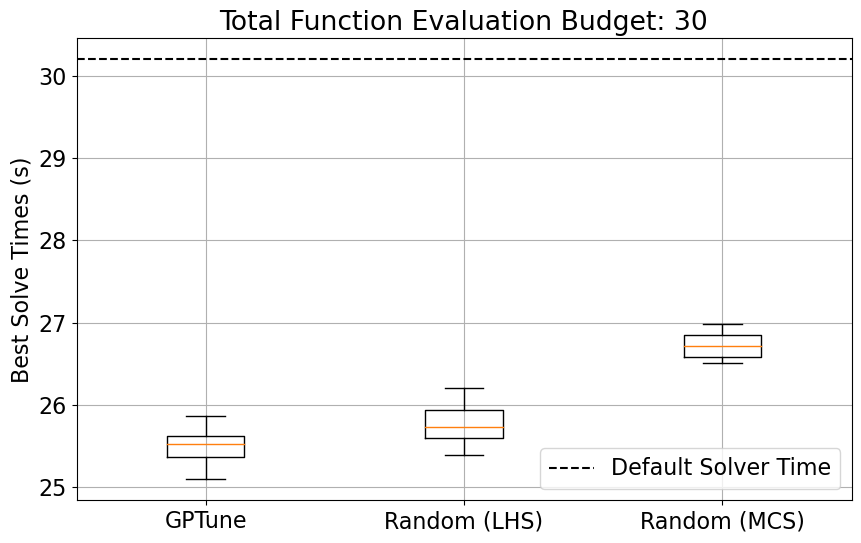

In [33]:
data_gp = DF.loc[DF["expname"] == "greengp"]["runtime"].to_numpy()
data_lhs = DF.loc[DF["expname"] == "greenlhs"]["runtime"].to_numpy()
data_mcs = DF.loc[DF["expname"] == "greenrand"]["runtime"].to_numpy()

labels = ["GPTune", "Random (LHS)", "Random (MCS)"]

data_all = [data_gp, data_lhs, data_mcs]

plt.figure(figsize=(10,6))
#plt.scatter(0*np.ones(data_gp.shape), data_gp, s=100, marker='x', color='blue')
#plt.scatter(1*np.ones(data_lhs.shape), data_lhs, s=100, marker='x', color='blue')
#plt.scatter(2*np.ones(data_mcs.shape), data_mcs, s=100, marker='x', color='blue')
plt.boxplot(data_all)
plt.plot([0.5, 3.5], [30.2, 30.2], '--', color='black', label="Default Solver Time")
plt.legend()
plt.grid()
plt.xlim([0.5,3.5])
plt.xticks([1,2,3], labels)
plt.title("Total Function Evaluation Budget: 30")
plt.ylabel("Best Solve Times (s)")
plt.show()

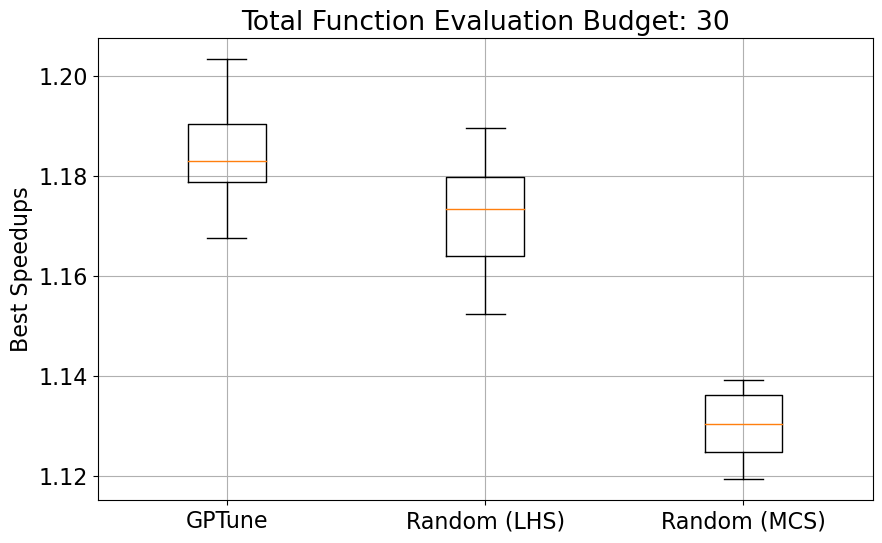

In [34]:
data_gp = 30.2 / DF.loc[DF["expname"] == "greengp"]["runtime"].to_numpy()
data_lhs = 30.2 / DF.loc[DF["expname"] == "greenlhs"]["runtime"].to_numpy()
data_mcs = 30.2 / DF.loc[DF["expname"] == "greenrand"]["runtime"].to_numpy()

labels = ["GPTune", "Random (LHS)", "Random (MCS)"]

data_all = [data_gp, data_lhs, data_mcs]

plt.figure(figsize=(10,6))
#plt.scatter(0*np.ones(data_gp.shape), data_gp, s=100, marker='x', color='blue')
#plt.scatter(1*np.ones(data_lhs.shape), data_lhs, s=100, marker='x', color='blue')
#plt.scatter(2*np.ones(data_mcs.shape), data_mcs, s=100, marker='x', color='blue')
plt.boxplot(data_all)
#plt.plot([0.5, 3.5], [30.2, 30.2], '--', color='black', label="Default Solver Time")
#plt.legend()
plt.grid()
plt.xlim([0.5,3.5])
plt.xticks([1,2,3], labels)
plt.title("Total Function Evaluation Budget: 30")
plt.ylabel("Best Speedups")
plt.show()